In [1]:
import requests
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [28]:
headers = {
    'authority': 'www.asos.com',
    'sec-ch-ua': '^\\^Chromium^\\^;v=^\\^92^\\^, ^\\^',
    'asos-c-plat': 'web',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36',
    'asos-c-name': 'asos-web-product-listing-page',
    'accept': 'application/json, text/plain, */*',
    'sec-ch-ua-mobile': '?0',
    'asos-c-ver': '1.1.1-a8be885fdf22-3622',
    'asos-cid': '063402f0-502c-4c6b-ab3c-7b66f32fec44',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.asos.com/men/sale/ctas/sale-edit-6/cat/?cid=28233&nlid=mw^%^7Csale^%^7Cshop^%^20sale^%^20by^%^20product^%^7Cbest^%^20of^%^20sale&page=3',
    'accept-language': 'en-US,en;q=0.9,de-DE;q=0.8,de;q=0.7',
    'cookie': 'browseCountry=GB; storeCode=COM; browseSizeSchema=UK; browseCurrency=GBP; browseLanguage=en-GB; currency=1; featuresId=e05fca48-253c-405b-bb89-f1c8aa5bd65d; geocountry=DE; bm_sz=736DDC7FE33703F003A5B173E2D2BADF~YAAQ180QAi8D8NB6AQAAPw5iHwz/IHHyx6g/CPFY6zo8nn1alkBZ/jb48Ed6P0dSsCwr4klH2xe6PLJIYm8m95PXXrJvpFkDt8Z01hRrrSQqH4gZHFbDy51zsUYkLCknWo/jH1kqq/9clCyPdYHqauL4O2HS3TjrG1+lTTRkmcf60MP/TmWK6nNGdPmmQJWbl9C4NNc26G+r/sCieStoqaQ0tN2lPGZZHa117wCQokz5zTX4ypbQyvWw+E7eC/WGH8DhlWkDAk1ImtJjXZBvXZbeTDLkBlXo6z4F4xSbXI4u~4600373~4405299; siteChromeVersion=au=11&com=11&de=11&dk=11&es=11&fr=11&it=11&nl=11&pl=11&roe=11&row=11&ru=11&se=11&us=11; keyStoreDataversion=hnm9sjt-28; asos-gdpr22=true; asos-b-sdv629=hnm9sjt-28; asos-perx=c18eeba1b40f4a6397cfdd7fd21fa6f9^|^|3fa9c19a63f345f0bb804ff378ac18dd; AMCVS_C0137F6A52DEAFCC0A490D4C^%^40AdobeOrg=1; AMCV_C0137F6A52DEAFCC0A490D4C^%^40AdobeOrg=-1303530583^%^7CMCMID^%^7C22063688722824849353113986842878306286^%^7CMCAID^%^7CNONE^%^7CMCOPTOUT-1628326326s^%^7CNONE^%^7CvVersion^%^7C3.3.0; _s_fpv=true; s_cc=true; floor=1001; asos=PreferredSite=&currencyid=1&currencylabel=GBP&customerguid=c18eeba1b40f4a6397cfdd7fd21fa6f9&topcatid=1001; stc-welcome-message=resolvedDeliveryCountry=DE&cappedPageCount=2&userTookActionOnWelcomeMessage=true; bm_mi=7AA28A08A5C5A979BC0BB78FC66B5DF9~LhYKUWMwkcdUMfuVrjzv0uzTXyjDP0tPrNKs3QPAi6Jgh/tyu//UhtIx1+HmMjqbXLNwxGIh1CrreB2Ydx0E2DhlAy4QL2JZGBjx+nZfHna2ZakOegzkrOvWNWMtAKw46dSZroxV7Lomu6Zh47zAm4TETZGsJqBKKY0NQKv4oydZwOxgZhtti8y119D8SybFXUPy/3JS6ZYw89fK80LbbUcP8YoWY381ZjBD4buScvNkBWOEAf1TUkqAx/uFJpaC; ak_bmsc=164685393A8BD96FE8D9A681CE92876B~000000000000000000000000000000~YAAQSmZWuIBDMbp6AQAAMft6HwwudwiVGoRoooMS1nSCFAqQ0B+UIou/9A0kc5OmT9Si9eplNxevO3FneYndbeAMfjtZoWboIp3yxpdq/dbAOKDXCwxbQqHzT5IKbD0hesFeJKwX2++f7ol+3boRfpuXROPdy1+oVf5QgFJ/QFNJw2YToFnu/T4OxGpPyw6EzsTEw3YhhA5NNXb3aDQX1MlA3UawMP69+RC0gKlRwj1Nctsn9D+ddCJ9Z006bowagooMhUTtI9WTMHwyghLVknsDB8NJ+q0ascGxu/58cxV/emtTOrKSUBa7THkcSPn1dbS59P9sfFeotkQXlt+NjKJ18iCtxwPXUzmYTUi8eCUElK+DbLK8QizyQdk2ka8XOwY8SXsjGRU3CuRqNP/qAlSt/AfuWQ1NkCe3GZiFGLveMPQDaBU6eot2YuP6HPYolYb3cvGwLXTzKQ==; _abck=600A6A08018CABED002C60BE85538032~0~YAAQSmZWuFTjMbp6AQAA/5Z9HwY1uakt+y87gjLoQxLz2Fkeys8oN1+wnNgzRs9xUwUsG1DApFjxynb04moY7zYX0zsR0I5qBvAHSF07m/OvTTg97NFKXN/Jppr3fZMc7enGydhOZffZB06Sv7CzqnViX79eYm5pWPKk5pms3MGmavJtcbI1iM1sgMLi5BxjAA+r7kLSvB2uafOr+J+5ZbQSsg8SF3Qu1+zF9z+0x7OS86cnEjdDI1RvWA1JgGBczsPNYXV2GkV8eoSucaUW53fr0K2E1RO6VD4eOlt5INgG7y2FSzkxpza/UAY38JCIl1DA4nrQ5Gq+nWzeVkWIEHBOskfg0ndGtVa6nIgQfiZ2/r8zMw1D0IeJHlf41+ct8UuqYkahBp6lhEmfOcDJcbOSVEhVAw==~-1~-1~-1; s_pers=^%^20s_vnum^%^3D1630447200758^%^2526vn^%^253D1^%^7C1630447200758^%^3B^%^20gpv_p6^%^3D^%^2520^%^7C1628322537651^%^3B^%^20s_invisit^%^3Dtrue^%^7C1628323218696^%^3B^%^20s_nr^%^3D1628321418699-Repeat^%^7C1659857418699^%^3B^%^20gpv_e47^%^3Dno^%^2520value^%^7C1628323218701^%^3B^%^20gpv_p10^%^3Ddesktop^%^2520com^%^257Ccategory^%^2520page^%^257C28233^%^2520page^%^25202^%^7C1628323218704^%^3B; plp_columsCount=twoColumns; s_sq=asoscomprod^%^3D^%^2526c.^%^2526a.^%^2526activitymap.^%^2526page^%^253Ddesktop^%^252520com^%^25257Ccategory^%^252520page^%^25257C28233^%^252520page^%^2525202^%^2526link^%^253DLOAD^%^252520MORE^%^2526region^%^253Dplp^%^2526pageIDType^%^253D1^%^2526.activitymap^%^2526.a^%^2526.c',
}

params = (
    ('channel', 'mobile-web'),
    ('country', 'GB'),
    ('currency', 'GBP'),
    ('keyStoreDataversion', 'hnm9sjt-28'),
    ('lang', 'en-GB'),
    ('limit', '72'),
    ('offset', '0'),
    ('rowlength', '2'),
    ('store', 'COM'),
)

response = requests.get('https://www.asos.com/api/product/search/v2/categories/28233', headers=headers, params=params)


In [29]:
response

<Response [200]>

In [6]:
json_obj = response.json()

In [7]:
json_obj.keys()

dict_keys(['searchTerm', 'categoryName', 'itemCount', 'redirectUrl', 'products', 'facets', 'diagnostics', 'searchPassMeta', 'queryId', 'discoverSearchProductTypes', 'campaigns'])

In [9]:
result_items = json_obj['products']

In [23]:
result_items

[{'id': 14924885,
  'name': 'ASOS DESIGN muscle fit ribbed half zip jumper in oatmeal',
  'price': {'current': {'value': 8.15, 'text': '£8.15'},
   'previous': {'value': 20.0, 'text': '£20.00'},
   'rrp': {'value': None, 'text': ''},
   'isMarkedDown': True,
   'isOutletPrice': False,
   'currency': 'GBP'},
  'colour': 'Oatmeal',
  'colourWayId': 16657208,
  'brandName': 'ASOS DESIGN',
  'hasVariantColours': False,
  'hasMultiplePrices': False,
  'groupId': None,
  'productCode': 1679713,
  'productType': 'Product',
  'url': 'asos-design/asos-design-muscle-fit-ribbed-half-zip-jumper-in-oatmeal/prd/14924885?clr=oatmeal&colourWayId=16657208',
  'imageUrl': 'images.asos-media.com/products/asos-design-muscle-fit-ribbed-half-zip-jumper-in-oatmeal/14924885-1-oatmeal',
  'videoUrl': None,
  'isSellingFast': True},
 {'id': 7103401,
  'name': 'ASOS DESIGN trainers in white',
  'price': {'current': {'value': 16.0, 'text': '£16.00'},
   'previous': {'value': 20.0, 'text': '£20.00'},
   'rrp': {'v

In [32]:
result_items[0]['isSellingFast']

True

In [31]:
result_items[0]['productType']

'Product'

In [30]:
result_items[0]['colour']

'Oatmeal'

In [10]:
result_items[0]['name']

'ASOS DESIGN muscle fit ribbed half zip jumper in oatmeal'

In [11]:
result_items[0]['brandName']

'ASOS DESIGN'

In [12]:
result_items[0]['price']['current']['text']

'£8.15'

In [13]:
result_items[0]['price']['previous']['text']

'£20.00'

In [11]:
name = []
brand = []
current_price = []
previous_price = []

for result in result_items:
    
    # name
    name.append(result['name'])
    
    # brand
    brand.append(result['brandName'])
    
    # current price
    current_price.append(result['price']['current']['text'])
    
    # previous price
    previous_price.append(result['price']['previous']['text'])
    

In [12]:
df = pd.DataFrame({'Name': name, 'Brand': brand, 'Current Price': current_price, 'Previous Price':previous_price})
df


,Name,Brand,Current Price,Previous Price
0,ASOS DESIGN muscle fit ribbed half zip jumper ...,ASOS DESIGN,£8.15,£20.00
1,ASOS DESIGN trainers in white,ASOS DESIGN,£16.00,£20.00
2,ASOS DESIGN cord slim trousers in washed purpl...,ASOS DESIGN,£12.60,£28.00
3,ASOS DESIGN spray on jeans in power stretch de...,ASOS DESIGN,£16.00,£20.00
4,ASOS DESIGN wide leg trousers with pleats in k...,ASOS DESIGN,£12.50,£25.00
...,...,...,...,...
67,ASOS DESIGN CIRCULAR cross body bag in navy,ASOS DESIGN,£8.10,£18.00
68,adidas Originals 'Summer Club' all over logo p...,adidas Originals,£64.40,£85.90
69,adidas Originals 'Summer Club' all over logo p...,adidas Originals,£30.05,£42.95
70,ASOS DESIGN denim jacket in light wash blue wi...,ASOS DESIGN,£30.00,£40.00


In [33]:
name = []
brand = []
color = []
product_type =[]
current_price = []
previous_price = []
issellingfast = []

for i in range(0,1440,72):

    headers = {
        'authority': 'www.asos.com',
        'sec-ch-ua': '^\\^Chromium^\\^;v=^\\^92^\\^, ^\\^',
        'asos-c-plat': 'web',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36',
        'asos-c-name': 'asos-web-product-listing-page',
        'accept': 'application/json, text/plain, */*',
        'sec-ch-ua-mobile': '?0',
        'asos-c-ver': '1.1.1-a8be885fdf22-3622',
        'asos-cid': '063402f0-502c-4c6b-ab3c-7b66f32fec44',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': 'https://www.asos.com/men/sale/ctas/sale-edit-6/cat/?cid=28233&nlid=mw^%^7Csale^%^7Cshop^%^20sale^%^20by^%^20product^%^7Cbest^%^20of^%^20sale&page=3',
        'accept-language': 'en-US,en;q=0.9,de-DE;q=0.8,de;q=0.7',
        'cookie': 'browseCountry=GB; storeCode=COM; browseSizeSchema=UK; browseCurrency=GBP; browseLanguage=en-GB; currency=1; featuresId=e05fca48-253c-405b-bb89-f1c8aa5bd65d; geocountry=DE; bm_sz=736DDC7FE33703F003A5B173E2D2BADF~YAAQ180QAi8D8NB6AQAAPw5iHwz/IHHyx6g/CPFY6zo8nn1alkBZ/jb48Ed6P0dSsCwr4klH2xe6PLJIYm8m95PXXrJvpFkDt8Z01hRrrSQqH4gZHFbDy51zsUYkLCknWo/jH1kqq/9clCyPdYHqauL4O2HS3TjrG1+lTTRkmcf60MP/TmWK6nNGdPmmQJWbl9C4NNc26G+r/sCieStoqaQ0tN2lPGZZHa117wCQokz5zTX4ypbQyvWw+E7eC/WGH8DhlWkDAk1ImtJjXZBvXZbeTDLkBlXo6z4F4xSbXI4u~4600373~4405299; siteChromeVersion=au=11&com=11&de=11&dk=11&es=11&fr=11&it=11&nl=11&pl=11&roe=11&row=11&ru=11&se=11&us=11; keyStoreDataversion=hnm9sjt-28; asos-gdpr22=true; asos-b-sdv629=hnm9sjt-28; asos-perx=c18eeba1b40f4a6397cfdd7fd21fa6f9^|^|3fa9c19a63f345f0bb804ff378ac18dd; AMCVS_C0137F6A52DEAFCC0A490D4C^%^40AdobeOrg=1; AMCV_C0137F6A52DEAFCC0A490D4C^%^40AdobeOrg=-1303530583^%^7CMCMID^%^7C22063688722824849353113986842878306286^%^7CMCAID^%^7CNONE^%^7CMCOPTOUT-1628326326s^%^7CNONE^%^7CvVersion^%^7C3.3.0; _s_fpv=true; s_cc=true; floor=1001; asos=PreferredSite=&currencyid=1&currencylabel=GBP&customerguid=c18eeba1b40f4a6397cfdd7fd21fa6f9&topcatid=1001; stc-welcome-message=resolvedDeliveryCountry=DE&cappedPageCount=2&userTookActionOnWelcomeMessage=true; bm_mi=7AA28A08A5C5A979BC0BB78FC66B5DF9~LhYKUWMwkcdUMfuVrjzv0uzTXyjDP0tPrNKs3QPAi6Jgh/tyu//UhtIx1+HmMjqbXLNwxGIh1CrreB2Ydx0E2DhlAy4QL2JZGBjx+nZfHna2ZakOegzkrOvWNWMtAKw46dSZroxV7Lomu6Zh47zAm4TETZGsJqBKKY0NQKv4oydZwOxgZhtti8y119D8SybFXUPy/3JS6ZYw89fK80LbbUcP8YoWY381ZjBD4buScvNkBWOEAf1TUkqAx/uFJpaC; ak_bmsc=164685393A8BD96FE8D9A681CE92876B~000000000000000000000000000000~YAAQSmZWuIBDMbp6AQAAMft6HwwudwiVGoRoooMS1nSCFAqQ0B+UIou/9A0kc5OmT9Si9eplNxevO3FneYndbeAMfjtZoWboIp3yxpdq/dbAOKDXCwxbQqHzT5IKbD0hesFeJKwX2++f7ol+3boRfpuXROPdy1+oVf5QgFJ/QFNJw2YToFnu/T4OxGpPyw6EzsTEw3YhhA5NNXb3aDQX1MlA3UawMP69+RC0gKlRwj1Nctsn9D+ddCJ9Z006bowagooMhUTtI9WTMHwyghLVknsDB8NJ+q0ascGxu/58cxV/emtTOrKSUBa7THkcSPn1dbS59P9sfFeotkQXlt+NjKJ18iCtxwPXUzmYTUi8eCUElK+DbLK8QizyQdk2ka8XOwY8SXsjGRU3CuRqNP/qAlSt/AfuWQ1NkCe3GZiFGLveMPQDaBU6eot2YuP6HPYolYb3cvGwLXTzKQ==; _abck=600A6A08018CABED002C60BE85538032~0~YAAQSmZWuFTjMbp6AQAA/5Z9HwY1uakt+y87gjLoQxLz2Fkeys8oN1+wnNgzRs9xUwUsG1DApFjxynb04moY7zYX0zsR0I5qBvAHSF07m/OvTTg97NFKXN/Jppr3fZMc7enGydhOZffZB06Sv7CzqnViX79eYm5pWPKk5pms3MGmavJtcbI1iM1sgMLi5BxjAA+r7kLSvB2uafOr+J+5ZbQSsg8SF3Qu1+zF9z+0x7OS86cnEjdDI1RvWA1JgGBczsPNYXV2GkV8eoSucaUW53fr0K2E1RO6VD4eOlt5INgG7y2FSzkxpza/UAY38JCIl1DA4nrQ5Gq+nWzeVkWIEHBOskfg0ndGtVa6nIgQfiZ2/r8zMw1D0IeJHlf41+ct8UuqYkahBp6lhEmfOcDJcbOSVEhVAw==~-1~-1~-1; s_pers=^%^20s_vnum^%^3D1630447200758^%^2526vn^%^253D1^%^7C1630447200758^%^3B^%^20gpv_p6^%^3D^%^2520^%^7C1628322537651^%^3B^%^20s_invisit^%^3Dtrue^%^7C1628323218696^%^3B^%^20s_nr^%^3D1628321418699-Repeat^%^7C1659857418699^%^3B^%^20gpv_e47^%^3Dno^%^2520value^%^7C1628323218701^%^3B^%^20gpv_p10^%^3Ddesktop^%^2520com^%^257Ccategory^%^2520page^%^257C28233^%^2520page^%^25202^%^7C1628323218704^%^3B; plp_columsCount=twoColumns; s_sq=asoscomprod^%^3D^%^2526c.^%^2526a.^%^2526activitymap.^%^2526page^%^253Ddesktop^%^252520com^%^25257Ccategory^%^252520page^%^25257C28233^%^252520page^%^2525202^%^2526link^%^253DLOAD^%^252520MORE^%^2526region^%^253Dplp^%^2526pageIDType^%^253D1^%^2526.activitymap^%^2526.a^%^2526.c',
    }

    params = (
        ('channel', 'mobile-web'),
        ('country', 'GB'),
        ('currency', 'GBP'),
        ('keyStoreDataversion', 'hnm9sjt-28'),
        ('lang', 'en-GB'),
        ('limit', '72'),
        ('offset', str(i)),
        ('rowlength', '2'),
        ('store', 'COM'),
    )

    response = requests.get('https://www.asos.com/api/product/search/v2/categories/28233', headers=headers, params=params)

    json_object = response.json()

    result_items = json_object['products']
    
    for result in result_items:
        # product name
        name.append(result['name'])

        # brand name
        brand.append(result['brandName'])
        
        #color
        color.append(result['colour'])
        
        #product type
        product_type.append(result['productType'])

        # current price
        current_price.append(result['price']['current']['text'])

        # previous price
        previous_price.append(result['price']['previous']['text'])
        
        #isselling fast
        issellingfast.append(result['isSellingFast'])

In [36]:
df = pd.DataFrame({'Product Name': name, 'Brand Name': brand, 'Color':color, 'Product Type':product_type ,'Current Price': current_price, 'Previous Price':previous_price, 'IsSellingFast':issellingfast})
df


,Product Name,Brand Name,Color,Product Type,Current Price,Previous Price,IsSellingFast
0,ASOS DESIGN muscle fit ribbed half zip jumper ...,ASOS DESIGN,Oatmeal,Product,£8.15,£20.00,True
1,ASOS DESIGN trainers in white,ASOS DESIGN,White,Product,£16.00,£20.00,True
2,ASOS DESIGN cord slim trousers in washed purpl...,ASOS DESIGN,Purple,Product,£12.60,£28.00,True
3,ASOS DESIGN wide leg trousers with pleats in k...,ASOS DESIGN,Khaki,Product,£12.50,£25.00,False
4,Puma Classics Tech sweatshirt in grey,Puma,Grey heather,Product,£27.50,£55.00,True
...,...,...,...,...,...,...,...
1435,River Island oversized sweat in ecru,River Island,Ecru,Product,£15.00,£30.00,False
1436,River Island jogger in washed grey,River Island,Washed grey,Product,£16.00,£32.00,False
1437,ASOS Unrvlld Spply oversized hoodie with refle...,ASOS Unrvlld Spply,Black,Product,£19.60,£40.00,False
1438,Jack & Jones quarter zip sweat scripted text,Jack & Jones,Tap shoe,Product,£13.30,£28.00,False


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Name    1440 non-null   object
 1   Brand Name      1440 non-null   object
 2   Color           1440 non-null   object
 3   Product Type    1440 non-null   object
 4   Current Price   1440 non-null   object
 5   Previous Price  1440 non-null   object
 6   IsSellingFast   1440 non-null   bool  
dtypes: bool(1), object(6)
memory usage: 69.0+ KB


In [38]:
df['Product Name'] = df['Product Name'].astype('string')

In [40]:
df['Brand Name'] = df['Brand Name'].astype('string')

In [41]:
df['Product Type'] = df['Product Type'].astype('string')

In [51]:
df['Color'] = df['Color'].astype('string')

In [42]:
df['Current Price'] = df['Current Price'].apply(lambda x:x.strip('£'))

In [43]:
df['Previous Price'] = df['Previous Price'].apply(lambda x:x.strip('£'))

In [48]:
df.loc[df['Previous Price'] == '', 'Previous Price'] = 0.0

In [47]:
df['Current Price'] = df['Current Price'].astype('float')

In [49]:
df['Previous Price']=df['Previous Price'].astype(float)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    1440 non-null   string 
 1   Brand Name      1440 non-null   string 
 2   Color           1440 non-null   string 
 3   Product Type    1440 non-null   string 
 4   Current Price   1440 non-null   float64
 5   Previous Price  1440 non-null   float64
 6   IsSellingFast   1440 non-null   bool   
dtypes: bool(1), float64(2), string(4)
memory usage: 69.0 KB


In [54]:
df.head()

,Product Name,Brand Name,Color,Product Type,Current Price,Previous Price,IsSellingFast
0,ASOS DESIGN muscle fit ribbed half zip jumper ...,ASOS DESIGN,Oatmeal,Product,8.15,20.0,True
1,ASOS DESIGN trainers in white,ASOS DESIGN,White,Product,16.00,20.0,True
2,ASOS DESIGN cord slim trousers in washed purpl...,ASOS DESIGN,Purple,Product,12.60,28.0,True
3,ASOS DESIGN wide leg trousers with pleats in k...,ASOS DESIGN,Khaki,Product,12.50,25.0,False
4,Puma Classics Tech sweatshirt in grey,Puma,Grey heather,Product,27.50,55.0,True


In [55]:
df.dtypes

Product Name       string
Brand Name         string
Color              string
Product Type       string
Current Price     float64
Previous Price    float64
IsSellingFast        bool
dtype: object

In [67]:
df['Discount'] = df['Current Price'] - df['Previous Price']

In [68]:
df

,Product Name,Brand Name,Color,Product Type,Current Price,Previous Price,IsSellingFast,Discount
0,ASOS DESIGN muscle fit ribbed half zip jumper ...,ASOS DESIGN,Oatmeal,Product,8.15,20.0,True,-11.85
1,ASOS DESIGN trainers in white,ASOS DESIGN,White,Product,16.00,20.0,True,-4.00
2,ASOS DESIGN cord slim trousers in washed purpl...,ASOS DESIGN,Purple,Product,12.60,28.0,True,-15.40
3,ASOS DESIGN wide leg trousers with pleats in k...,ASOS DESIGN,Khaki,Product,12.50,25.0,False,-12.50
4,Puma Classics Tech sweatshirt in grey,Puma,Grey heather,Product,27.50,55.0,True,-27.50
...,...,...,...,...,...,...,...,...
1435,River Island oversized sweat in ecru,River Island,Ecru,Product,15.00,30.0,False,-15.00
1436,River Island jogger in washed grey,River Island,Washed grey,Product,16.00,32.0,False,-16.00
1437,ASOS Unrvlld Spply oversized hoodie with refle...,ASOS Unrvlld Spply,Black,Product,19.60,40.0,False,-20.40
1438,Jack & Jones quarter zip sweat scripted text,Jack & Jones,Tap shoe,Product,13.30,28.0,False,-14.70


In [60]:
import seaborn as sns

In [56]:
data=df['Brand Name'].value_counts().head(5)
print(data)

ASOS DESIGN         718
Topman               71
River Island         39
Puma                 33
ASOS Dark Future     32
Name: Brand Name, dtype: Int64


<AxesSubplot:>

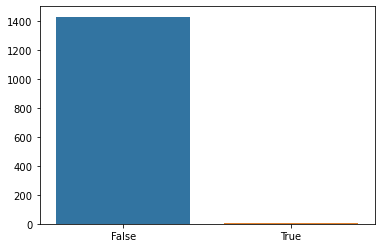

In [70]:
data=df['IsSellingFast'].value_counts()
sns.barplot(x=data.index,y=data.values,data=df)

<AxesSubplot:>

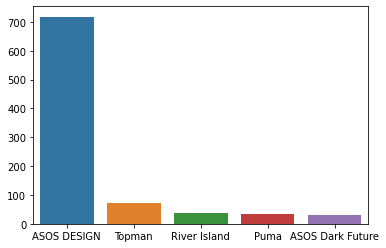

In [57]:
sns.barplot(x=data.index,y=data.values,data=df_asos)

C:\Users\ACER\anaconda3\envs\envDataAnal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Type', ylabel='Current Price'>

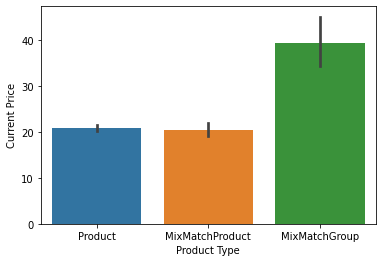

In [66]:
sns.barplot(df['Product Type'], df['Current Price'])

C:\Users\ACER\anaconda3\envs\envDataAnal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Type', ylabel='Discount'>

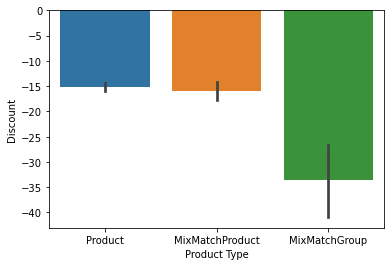

In [69]:
sns.barplot(df['Product Type'], df['Discount'])

C:\Users\ACER\anaconda3\envs\envDataAnal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Current Price', ylabel='Previous Price'>

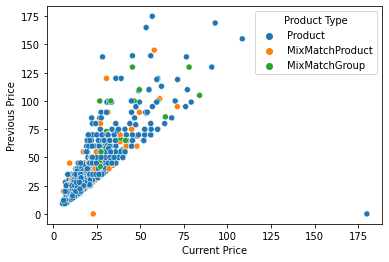

In [63]:
sns.scatterplot(df['Current Price'], df['Previous Price'], hue=df['Product Type'])

C:\Users\ACER\anaconda3\envs\envDataAnal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previous Price'>

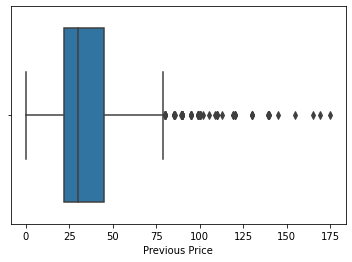

In [72]:
sns.boxplot(df['Previous Price'])

C:\Users\ACER\anaconda3\envs\envDataAnal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brand', ylabel='count'>

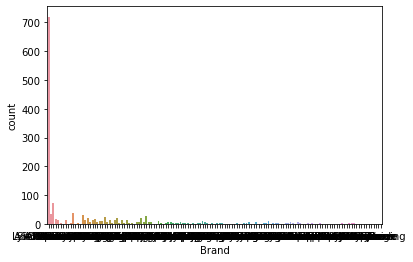

In [18]:
sns.countplot(df_asos['Brand'])

C:\Users\ACER\anaconda3\envs\envDataAnal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'ASOS DESIGN'),
  Text(1, 0, 'Puma'),
  Text(2, 0, 'Topman'),
  Text(3, 0, 'New Look'),
  Text(4, 0, 'Reebok'),
  Text(5, 0, 'Pre London'),
  Text(6, 0, 'Smith And Canova'),
  Text(7, 0, 'ASOS Day Social'),
  Text(8, 0, 'Lyle & Scott Bodywear'),
  Text(9, 0, 'Another Influence'),
  Text(10, 0, 'River Island'),
  Text(11, 0, 'Nike Running'),
  Text(12, 0, 'Criminal Damage'),
  Text(13, 0, 'Chained & Able'),
  Text(14, 0, 'ASOS Dark Future'),
  Text(15, 0, 'Reclaimed Vintage'),
  Text(16, 0, 'The Couture Club'),
  Text(17, 0, 'Nike'),
  Text(18, 0, 'Jack & Jones'),
  Text(19, 0, 'adidas Originals'),
  Text(20, 0, 'Liquor N Poker'),
  Text(21, 0, 'Mennace'),
  Text(22, 0, 'Under Armour'),
  Text(23, 0, 'Collusion')])

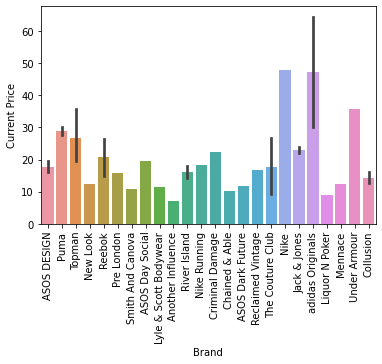

In [56]:
sns.barplot(df_asos['Brand'].head(100), df_asos['Current Price'])
plt.xticks(rotation='vertical')

C:\Users\ACER\anaconda3\envs\envDataAnal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'ASOS DESIGN'),
  Text(1, 0, 'ASOS 4505'),
  Text(2, 0, 'Columbia'),
  Text(3, 0, 'Criminal Damage'),
  Text(4, 0, 'Vans'),
  Text(5, 0, 'Harry Brown'),
  Text(6, 0, 'Billabong'),
  Text(7, 0, 'Puma'),
  Text(8, 0, 'Reebok'),
  Text(9, 0, 'Bolongaro Trevor'),
  Text(10, 0, 'Hi-Tec'),
  Text(11, 0, 'Farah'),
  Text(12, 0, 'Under Armour'),
  Text(13, 0, 'adidas Originals'),
  Text(14, 0, 'New Look'),
  Text(15, 0, 'ASOS Actual'),
  Text(16, 0, 'Collusion'),
  Text(17, 0, 'Voi Jeans'),
  Text(18, 0, 'Another Influence'),
  Text(19, 0, 'ASOS Dark Future'),
  Text(20, 0, 'Vintage Supply'),
  Text(21, 0, 'The North Face'),
  Text(22, 0, 'French Connection'),
  Text(23, 0, 'ASOS Day Social'),
  Text(24, 0, 'River Island'),
  Text(25, 0, 'Pull&Bear'),
  Text(26, 0, 'Original Penguin'),
  Text(27, 0, 'B

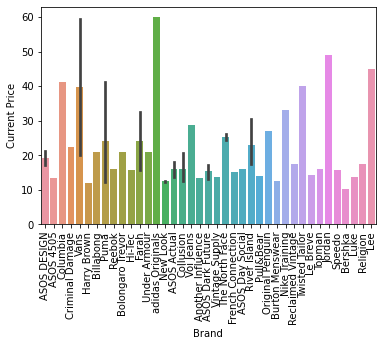

In [57]:
sns.barplot(df_asos['Brand'].tail(100), df_asos['Current Price'])
plt.xticks(rotation='vertical')

In [74]:
df[['Product Name']][df['Current Price']==df['Current Price'].max()]

,Product Name
886,Calvin Klein stretch wool suit jacket


In [75]:
df[['Product Name']][df['Current Price']==df['Current Price'].min()]

,Product Name
1216,Only & Sons longline curved hem t-shirt in black


In [16]:
df_asos.to_csv('asos.csv', index=False)

In [77]:
round(df['Current Price'].mean(), 2)

21.2

In [78]:
df['Current Price'].median()

17.5

In [79]:
round(df['Current Price'].std(), 2)

12.9

In [80]:
round(df['Discount'].mean(), 2)

-15.76

In [81]:
df['Discount'].median()

-12.5

In [83]:
df.describe()

,Current Price,Previous Price,Discount
count,1440.000000,1440.000000,1440.000000
mean,21.200417,36.961201,-15.760785
std,12.903277,22.621751,14.475185
min,5.400000,0.000000,-118.150000
25%,13.487500,22.000000,-19.250000
50%,17.500000,30.000000,-12.500000
75%,24.500000,45.000000,-7.200000
max,180.000000,175.000000,180.000000


In [84]:
df.corr()

,Current Price,Previous Price,IsSellingFast,Discount
Current Price,1.000000,0.802870,-0.032525,-0.363315
Previous Price,0.802870,1.000000,-0.027140,-0.847111
IsSellingFast,-0.032525,-0.027140,1.000000,0.013421
Discount,-0.363315,-0.847111,0.013421,1.000000


<AxesSubplot:>

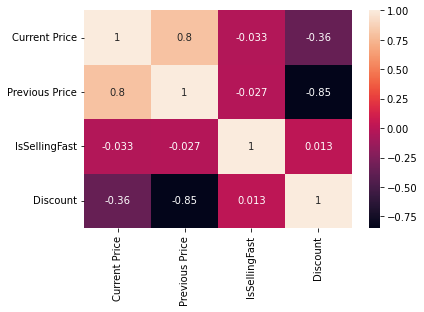

In [86]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Current Price', ylabel='Count'>

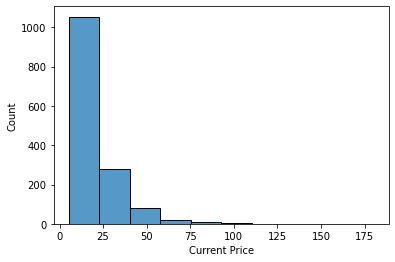

In [88]:
sns.histplot(df['Current Price'], bins=10)

<AxesSubplot:xlabel='Previous Price', ylabel='Count'>

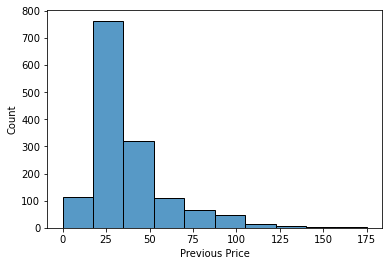

In [89]:
sns.histplot(df['Previous Price'], bins=10)

In [90]:
df.to_csv('asos_data.csv', index=False)